# SVM - Linear

In [93]:
from sklearn import datasets

iris = datasets.load_iris()

x = iris['data'][:, 2:4]
y = iris['target']

### Seperating x's and y's for all those which are either setosa or versicolor (0 or 1)

In [94]:
x = x[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

In [80]:
from sklearn import svm

clf = svm.SVC(C=float("inf"), kernel='linear')
clf.fit(x, y)
clf.predict([[2.4, 3.1]])

array([1])

In [82]:
print(clf.intercept_)

[-3.78823471]


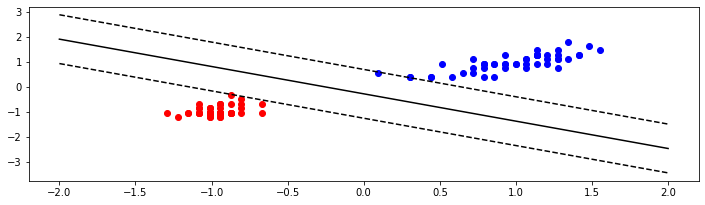

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.figure()
# scaler = StandardScaler()
x_scaled = StandardScaler().fit_transform(x)

clf.fit(x_scaled, y)

plt.scatter(x_scaled[:, 0][y==1], x_scaled[:, 1][y==1], c='b')
plt.scatter(x_scaled[:, 0][y==0], x_scaled[:, 1][y==0], c='r')

# ploting the sv line
# w0 * x0 + w1 * x1 + b = 0
# x1 = -w0/w1 * x0 - b/w0

x0 = np.linspace(-2, 2, 1000)
w0 = clf.coef_[0][0]
w1 = clf.coef_[0][1]
b = clf.intercept_[0]
x1 = -w0/w1 * x0 - b/w0

plt.plot(x0, x1, 'k-')
margin = 1/w1
plt.plot(x0, x1 + margin, 'k--')
plt.plot(x0, x1 - margin, 'k--')
# plt.axis([-2, 2, -2, 2])